In [1]:
import numpy as np
import matplotlib.pyplot as plt
from slab import SlabExact
%matplotlib widget
plt.style.use('dark_background')
from IPython.display import Video


In [2]:
A = SlabExact(ns=[1.4], ts=[6e-6], xrefs=[2000], symmetric=True)

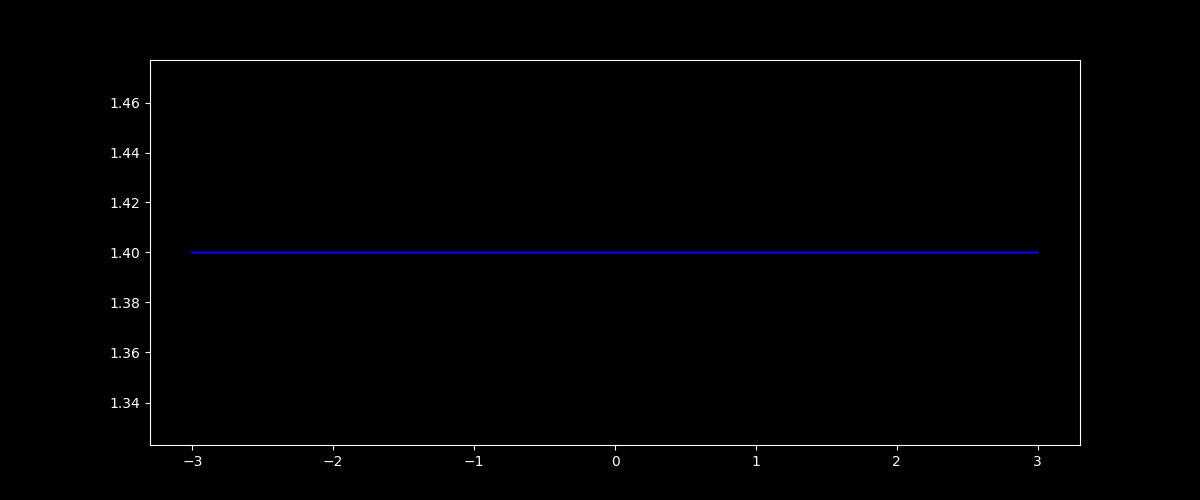

In [3]:
A.plot_refractive_index()

In [4]:
mode_type='radiation'
field_type='TE'

## Radiation Modes on Single region

In [7]:
F = A.fields(0, mode_type=mode_type, field_type=field_type, sign='-1')  # Odd mode just use phase=pi/2

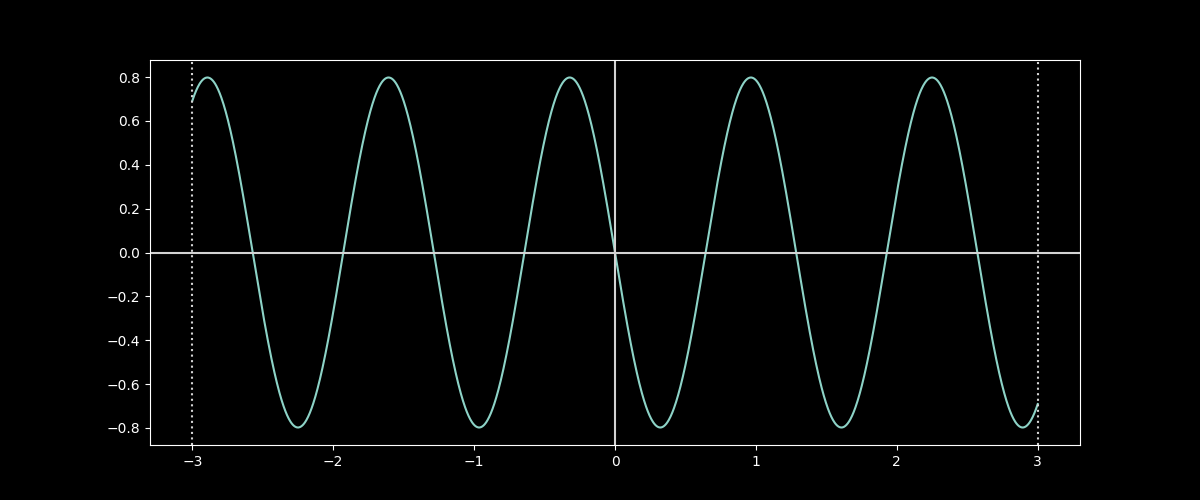

In [8]:
A.plot_field_1d(F)

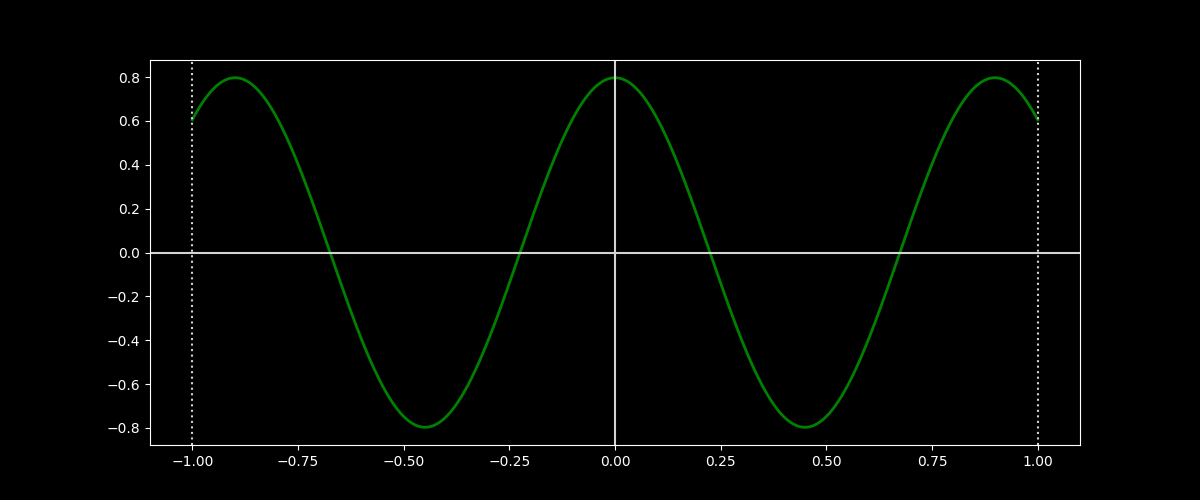

In [39]:
A.animate_field_1d(F, 'videos/single_region_radiation_mode', linewidth=2, color='g')

In [40]:
Video('videos/single_region_radiation_mode' +'.mp4', html_attributes="controls loop")


## Radiation mode profiles as beta varies

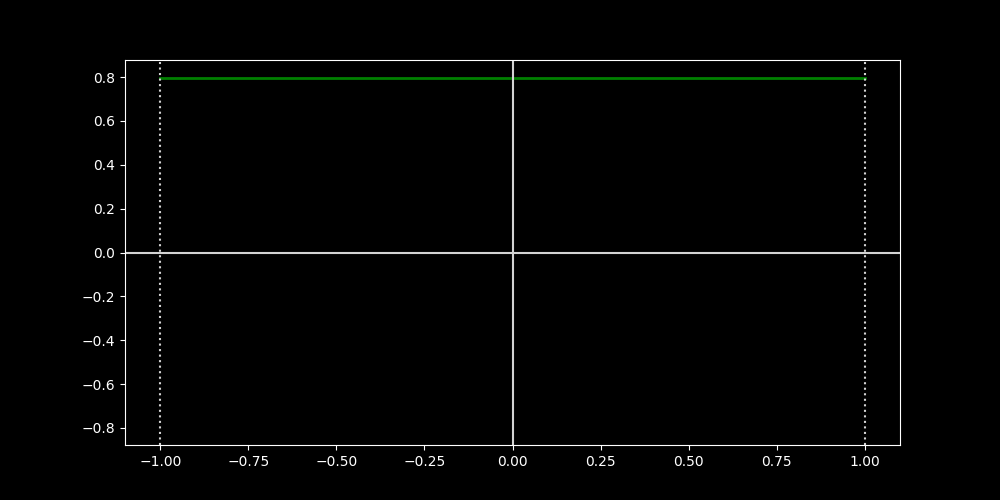

In [60]:
A.radiation_mode_beta_animation('videos/single_region_beta_animation_even', linewidth=2, color='g', 
                                figsize=(10,5), fps=32, secs=3, phase=0)

In [61]:
Video('videos/single_region_beta_animation_even' +'.mp4', html_attributes="controls loop")


## Propagation 

In [16]:
def f(x):
    return 1-x**2
    
def g(x):
    return np.exp(-x**2)

def dirac_exact(beta, field_type='TE', phase=0):
    M = A.coefficients(beta, up_to_region=0, field_type=field_type, mode_type='radiation',
                       phase=phase)
    return beta/(2*A.K0)*np.sum(M)


In [17]:
dirac_exact(1)

(0.11428854468163376+0j)

In [78]:
Propagator = A.propagator()

In [79]:
Pimag = Propagator(f=f, Lx=-1, Rx=1, R_beta=100,  N_beta=200, epsabs=1e-5, epsrel=1e-5, phase=0, 
                   beta_factor=True, imag_type=True)

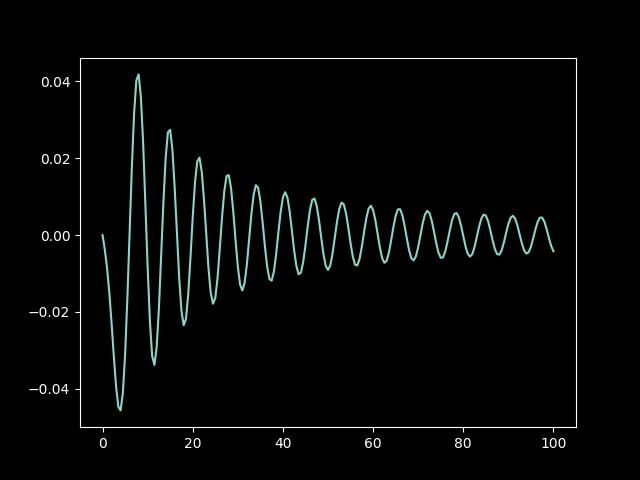

In [80]:
plt.close('all')
plt.plot(Pimag.betas.imag, Pimag.alphas.imag);


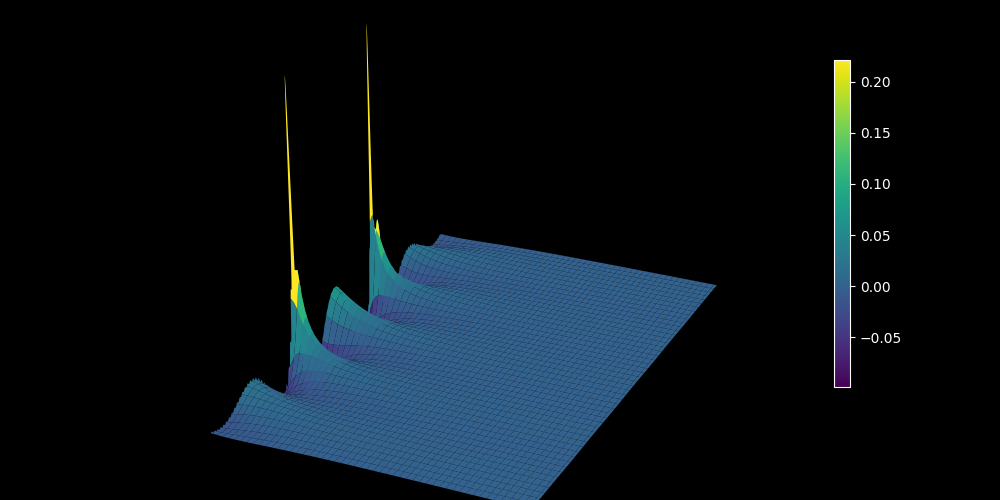

In [81]:
A.plot_field_2d(Pimag.propagate, surface=True, part='real', zoom=2)

In [82]:
Peven = Propagator(f=f, Lx=-1, Rx=1, N_beta=100, epsabs=1e1, epsrel=1e1, phase=0)

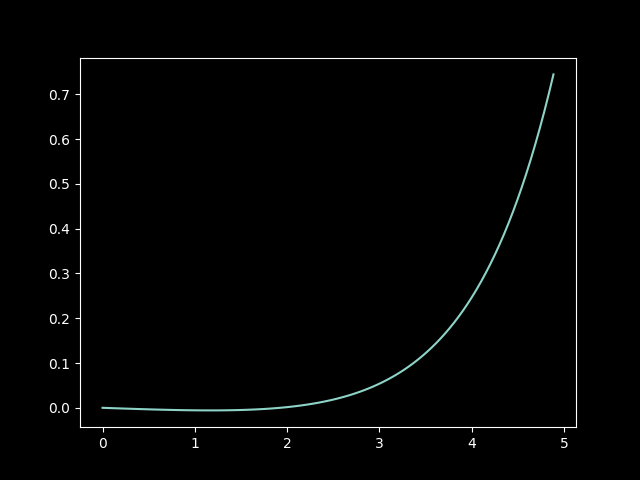

In [83]:
plt.close('all')
plt.plot(Peven.betas, Peven.alphas.real);

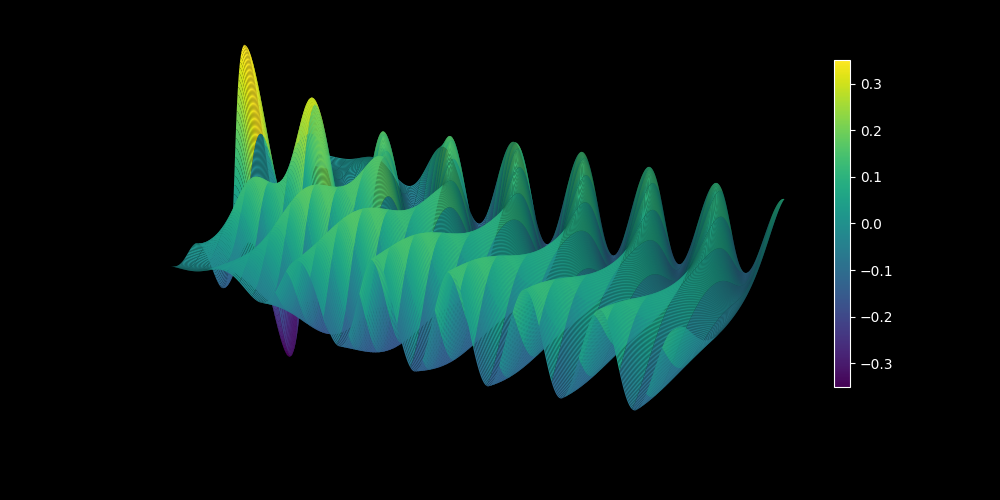

In [84]:
A.plot_field_2d(Peven.propagate, zmax=10, zref=400, colorbar=True, figwidth=5,
                surface=True, cstride=10, rstride=10, zoom=2, part='real')


In [85]:
F = lambda x, zs=None : Peven.propagate(x,zs) + Pimag.propagate(x,zs)

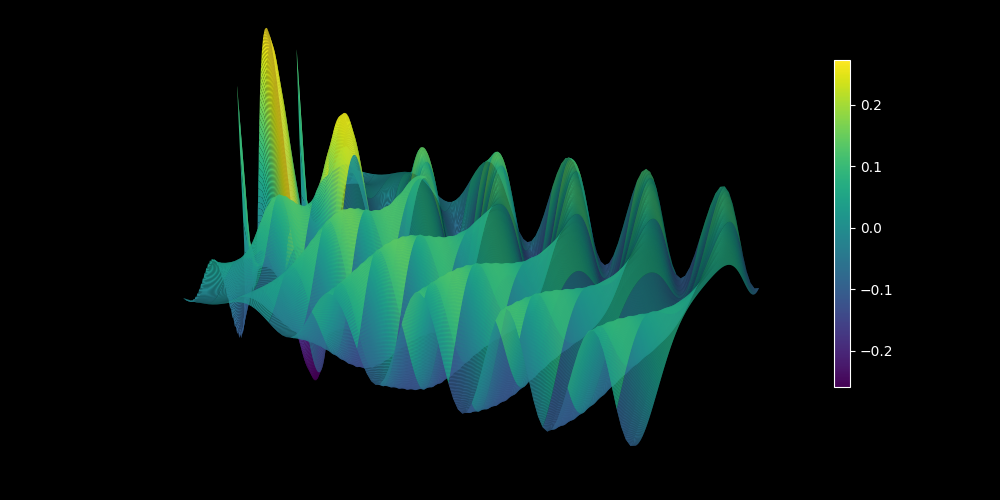

In [87]:
A.plot_field_2d(F, zmax=8, surface=True, cstride=5, rstride=5)

In [88]:
Fslice = lambda x, zs=0: Peven.slice_propagate(x,zs) + Pimag.slice_propagate(x,zs)

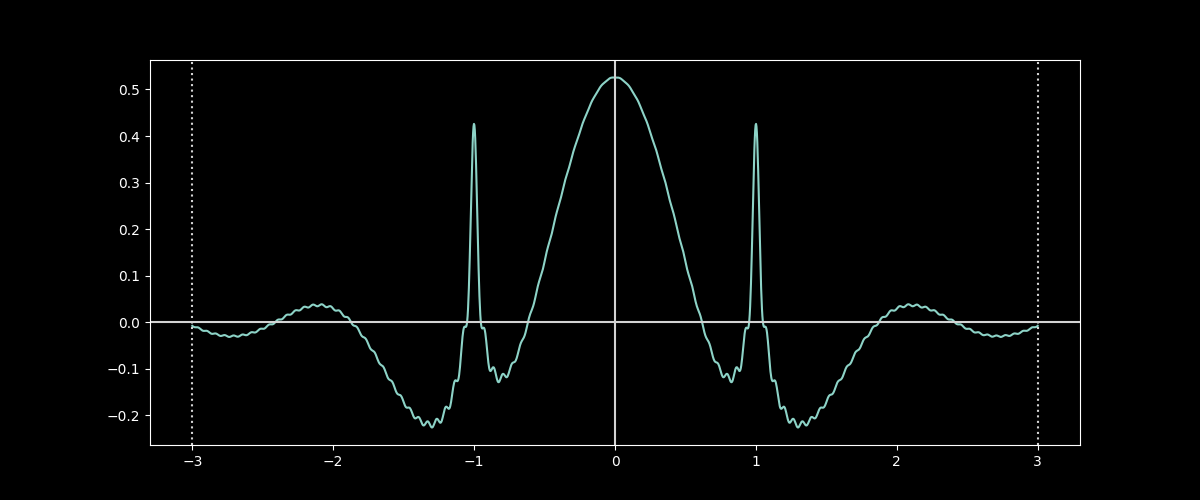

In [89]:
A.plot_field_1d(Fslice, part='real')


### Other function

In [269]:
beta_factor=True
phase=0

In [277]:
Pimag2 = Propagator(f=g, Lx=-5, Rx=5, R_beta=20,  N_beta=100, epsabs=1e-5, epsrel=1e-5, phase=phase, 
                   beta_factor=beta_factor, imag_type=True)

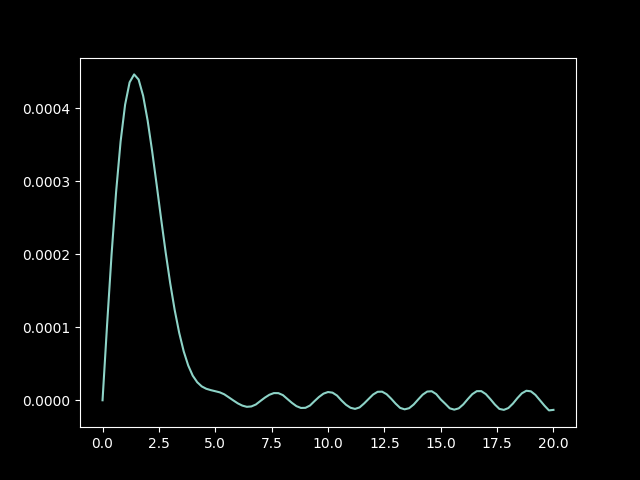

In [278]:
plt.close('all')
plt.plot(Pimag2.betas.imag, Pimag2.alphas.imag);


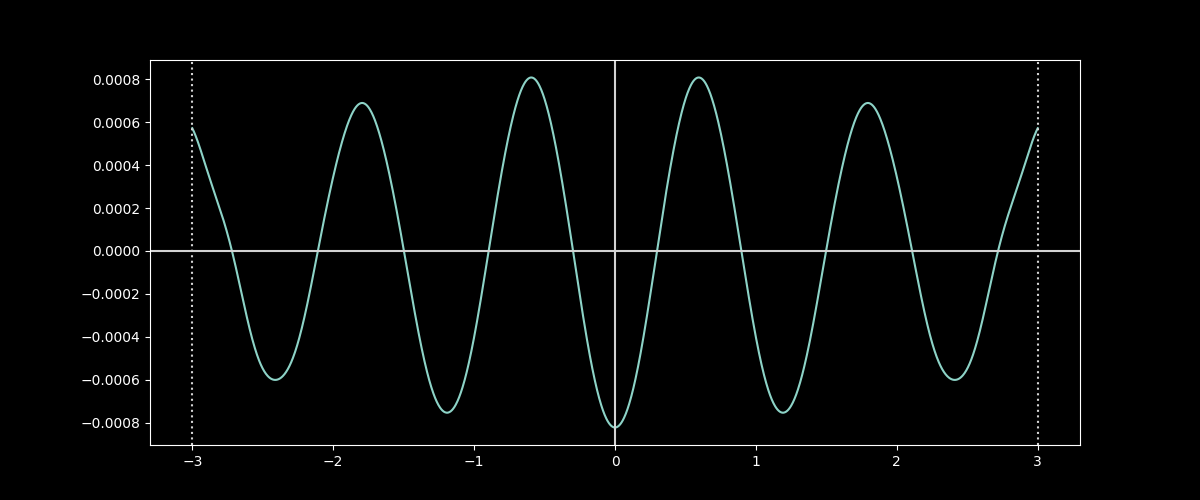

In [287]:
A.plot_field_1d(Pimag2.slice_propagate)

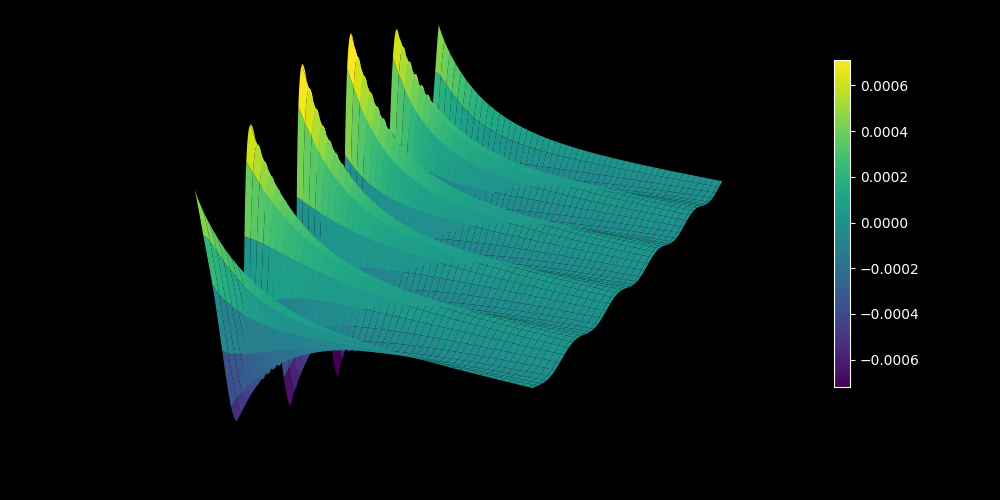

In [279]:
A.plot_field_2d(Pimag2.propagate, surface=True, part='real', zoom=2)

In [280]:
Peven2 = Propagator(f=g, Lx=-5, Rx=5, N_beta=100, epsabs=1e1, epsrel=1e1, phase=phase,
                   beta_factor=beta_factor)

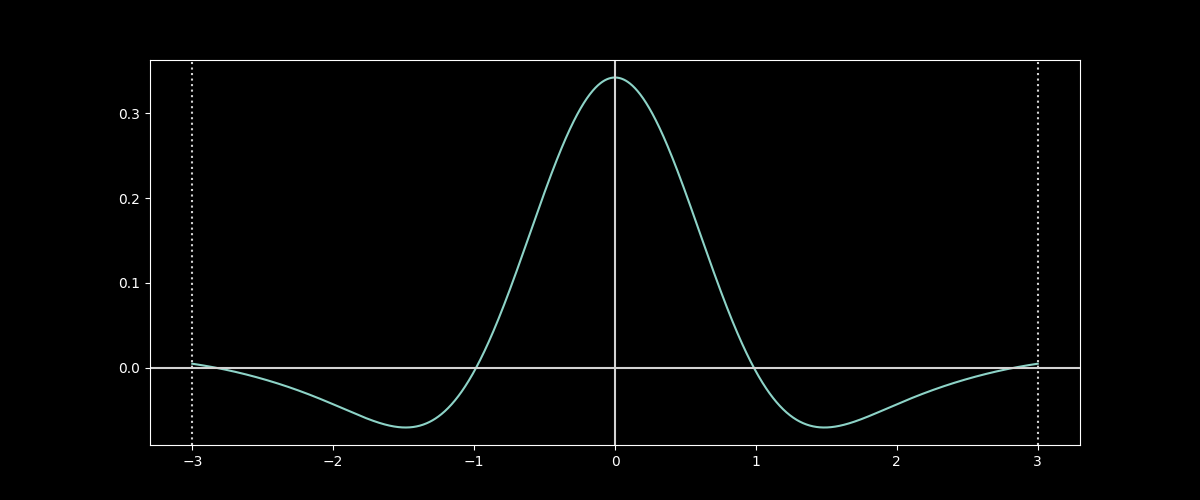

In [281]:
A.plot_field_1d(Peven2.slice_propagate)

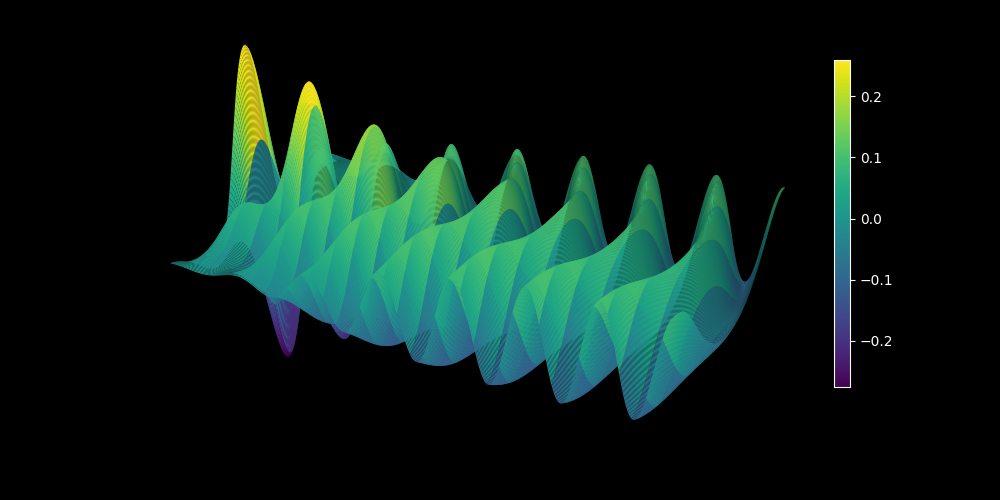

In [282]:
A.plot_field_2d(Peven2.propagate, zmax=10, zref=400, colorbar=True, figwidth=5,
                surface=True, cstride=10, rstride=10, zoom=2, part='real')


In [289]:
F2 = lambda x, zs=None : Peven2.propagate(x,zs) + Pimag2.propagate(x,zs)

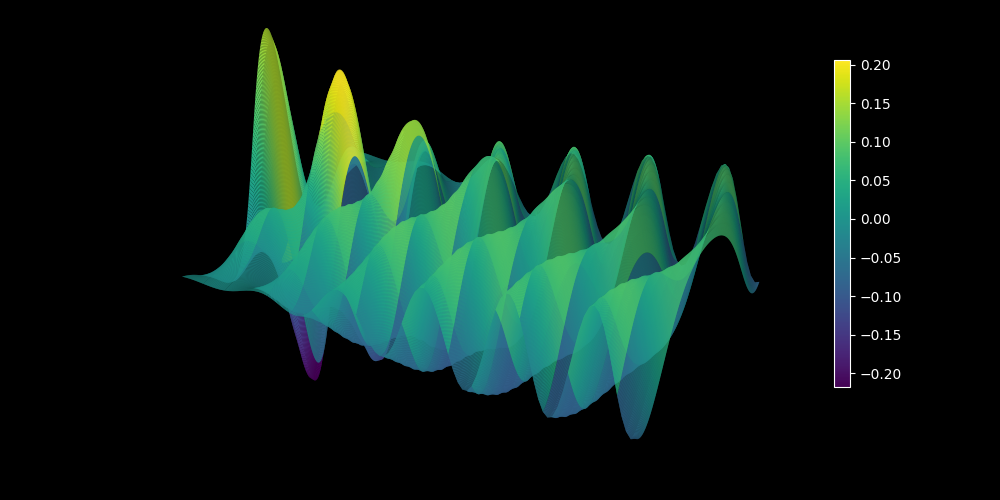

In [290]:
A.plot_field_2d(F2, zmax=8, surface=True, cstride=5, rstride=5)

In [285]:
Fslice2 = lambda x, zs=0: Peven2.slice_propagate(x,zs) + Pimag2.slice_propagate(x,zs)

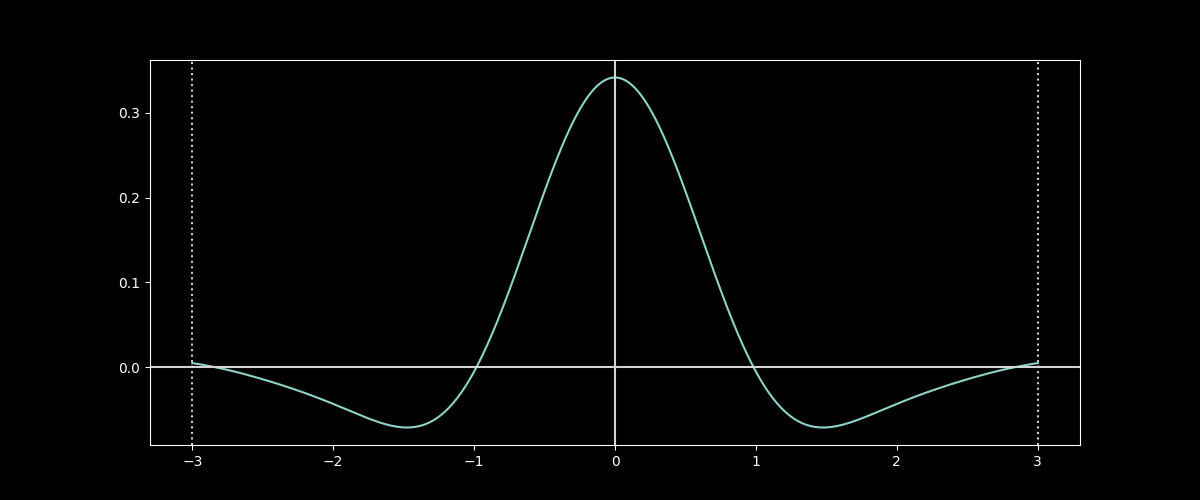

In [288]:
A.plot_field_1d(Fslice2, part='real')


## Try integrating over phase

From zero to pi/2

In [230]:
phases = np.linspace(0, np.pi/2, 4)
dp = phases[1] - phases[0]


In [231]:
Ps = np.zeros_like(phases, dtype='object')
for i, phase in enumerate(phases):
    Ps[i] = Propagator(f=g, Lx=-1, Rx=1, R_beta=100,  N_beta=300, epsabs=1e-5, epsrel=1e-5, phase=phase, 
                   beta_factor=beta_factor, imag_type=True)

In [231]:
Pimags = np.zeros_like(phases, dtype='object')
for i, phase in enumerate(phases):
    Pimags[i] = Propagator(f=g, Lx=-5, Rx=5, N_beta=100, epsabs=1e1, epsrel=1e1, phase=phase,
                   beta_factor=beta_factor)

In [232]:
IntPs = lambda x, zs=0: np.sum([P.slice_propagate(x,zs) for P in Ps], axis=0)

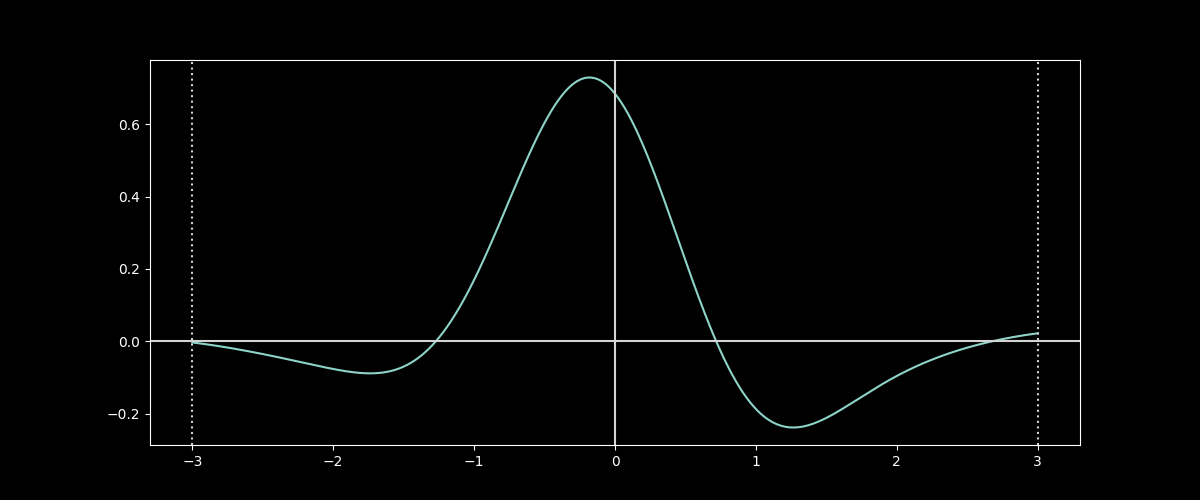

In [233]:
A.plot_field_1d(IntPs, part='real')


That doesn't seem to be it...

## Exact dirac impulse propagation

In [42]:
def dirac_exact(beta, field_type='TE', phase=0):
    M = A.coefficients(beta, up_to_region=0, field_type=field_type, mode_type='radiation',
                       phase=phase)
    return beta/(2*A.K0)*np.sum(M)

In [20]:
Propagator = A.propagator()

In [38]:
Peven3 = Propagator(exact_coeff_func=dirac_exact, L_beta=0, phase=0)
Pimag3 = Propagator(exact_coeff_func=dirac_exact, L_beta=0, R_beta=100, N_beta=1000, phase=0, imag_type=True)

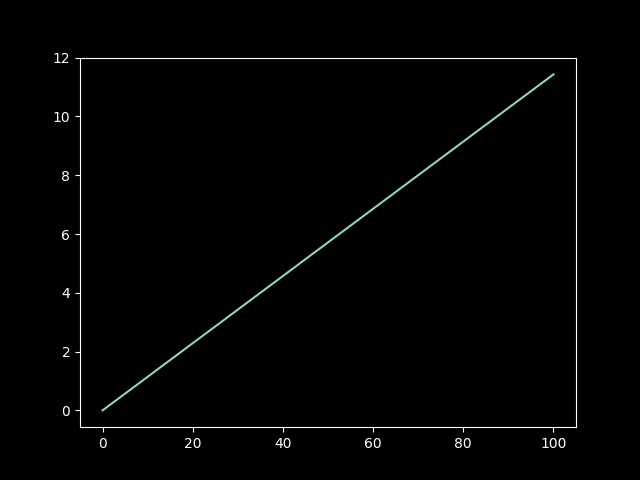

In [39]:
plt.close('all')
plt.plot(Pimag3.betas.imag, Pimag3.alphas.imag);


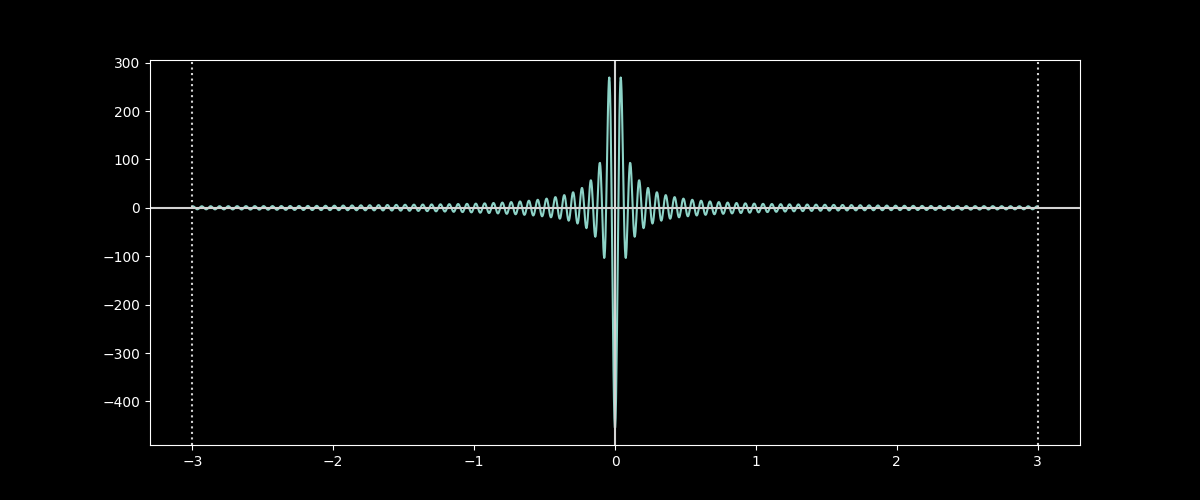

In [40]:
A.plot_field_1d(Pimag3.slice_propagate)

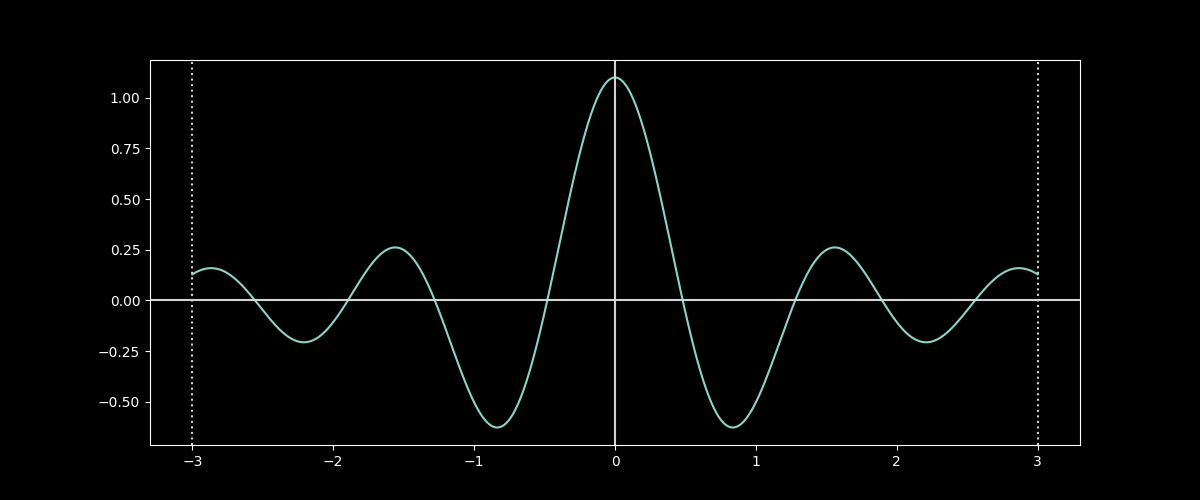

In [41]:
A.plot_field_1d(Peven3.slice_propagate)